In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\rprioleau\OneDrive - Healthfirst\Desktop\Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20240609.csv")

C:\Users\rprioleau\AppData\Local\Temp\ipykernel_349080\1496267620.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\rprioleau\OneDrive - Healthfirst\Desktop\Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20240609.csv")


In [ ]:
#This data set includes hospital inpatient discharges across New York State for all diagnosis in calendar year 2022.  The data has 2.06 million rows and 33 columns.  Each row in the data set represents a patient's inpatient stay.

In [ ]:
#The goal of this analysis is to review hospital inpatient discharges related to mental health in Kings County, New York.  In this analysis, we will: 1. review the top 5 mental health diagnosis for hospital inpatient stays, 2. review the high-volume hospitals with more than 50 inpatient events, and 3. review admissions by race, age group, and gender.

In [ ]:
#Before we can conduct this analysis, we must clean the data set and remove missing values.

In [3]:
missing_values=["(null)", "n/a", "_", "s"]
df = pd.read_csv(r"C:\Users\rprioleau\OneDrive - Healthfirst\Desktop\Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20240609.csv",
na_values = missing_values)

C:\Users\rprioleau\AppData\Local\Temp\ipykernel_349080\601128738.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\rprioleau\OneDrive - Healthfirst\Desktop\Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20240609.csv",


In [4]:
df

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,50 to 69,107,F,White,Not Span/Hispanic,...,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,"51,514.62","7,552.54"
1,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,M,Black/African American,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"25,370.86","3,469.55"
2,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Medical,Medicaid,NaN,NaN,NaN,N,"23,876.78","6,180.33"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,18 to 29,100,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"43,319.05","12,588.93"
4,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,M,Other Race,Spanish/Hispanic,...,Moderate,Moderate,Medical,Medicaid,NaN,NaN,NaN,Y,"40,266.23","10,355.99"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,30 to 49,OOS,M,White,Not Span/Hispanic,...,Extreme,Extreme,Medical,Medicare,Blue Cross/Blue Shield,NaN,NaN,Y,"31,035.20","13,278.98"
1048571,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,50 to 69,146,M,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Surgical,Medicare,Medicaid,NaN,NaN,Y,"93,468.50","43,548.63"
1048572,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,18 to 29,146,F,Black/African American,Not Span/Hispanic,...,Major,Minor,Medical,Medicaid,NaN,NaN,NaN,N,"10,184.38","5,372.73"
1048573,Finger Lakes,Monroe,2701005.0,413.0,Strong Memorial Hospital,18 to 29,146,M,Multi-racial,Spanish/Hispanic,...,Extreme,Extreme,Surgical,Medicaid,NaN,NaN,NaN,Y,"31,116.70","7,695.58"


In [ ]:
#The next step is to filter the the data to look at only inpatient discharges related to mental health in Kings County, New York and the admissions type is "Emergency".  

In [5]:
df2 = df[(df['Hospital County'] == 'Kings') & (df['Type of Admission'] == 'Emergency') & (df['APR MDC Description'] == 'MENTAL DISEASES AND DISORDERS')]

In [6]:
df2

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
930,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,30 to 49,112,F,Black/African American,Unknown,...,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,"5,936.22","4,285.16"
1216,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,30 to 49,112,F,Black/African American,Unknown,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"6,242.66","4,254.93"
1226,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,18 to 29,104,M,White,Unknown,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"6,085.67","4,147.93"
1318,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,18 to 29,112,F,Black/African American,Unknown,...,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,"14,567.10","10,515.49"
1371,New York City,Kings,7001016.0,1301.0,Kings County Hospital Center,30 to 49,112,M,Multi-racial,Unknown,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"10,484.07","7,568.09"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047910,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,18 to 29,113,F,White,Spanish/Hispanic,...,Minor,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"57,401.27","39,124.07"
1047912,New York City,Kings,7001009.0,1294.0,Coney Island Hospital,30 to 49,112,M,Other Race,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"49,803.17","22,759.00"
1047922,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,30 to 49,104,M,Black/African American,Unknown,...,Minor,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,"10,910.79","7,436.67"
1047975,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,18 to 29,112,M,Other Race,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"188,802.18","128,685.49"


In [7]:
#We will identify the top 5 mental health diagnosis that took place in calendar year 2022.  I will utilize the GroupBy function to pull this information and I will utilize the Bar Chart tool to visualize the top 5 diagnoses.

In [8]:
df2.groupby(['APR DRG Description'])['APR DRG Description'].count()

APR DRG Description
ACUTE ANXIETY AND DELIRIUM STATES                                 103
ADJUSTMENT DISORDERS AND NEUROSES EXCEPT DEPRESSIVE DIAGNOSES      58
BEHAVIORAL DISORDERS                                               26
BIPOLAR DISORDERS                                                 759
DEPRESSION EXCEPT MAJOR DEPRESSIVE DISORDER                       227
DISORDERS OF PERSONALITY AND IMPULSE CONTROL                       25
EATING DISORDERS                                                    3
MAJOR DEPRESSIVE DISORDERS AND OTHER OR UNSPECIFIED PSYCHOSES     694
MENTAL ILLNESS DIAGNOSIS WITH O.R. PROCEDURE                        9
ORGANIC MENTAL HEALTH DISTURBANCES                                 37
OTHER MENTAL HEALTH DISORDERS                                      43
SCHIZOPHRENIA                                                    1718
Name: APR DRG Description, dtype: int64

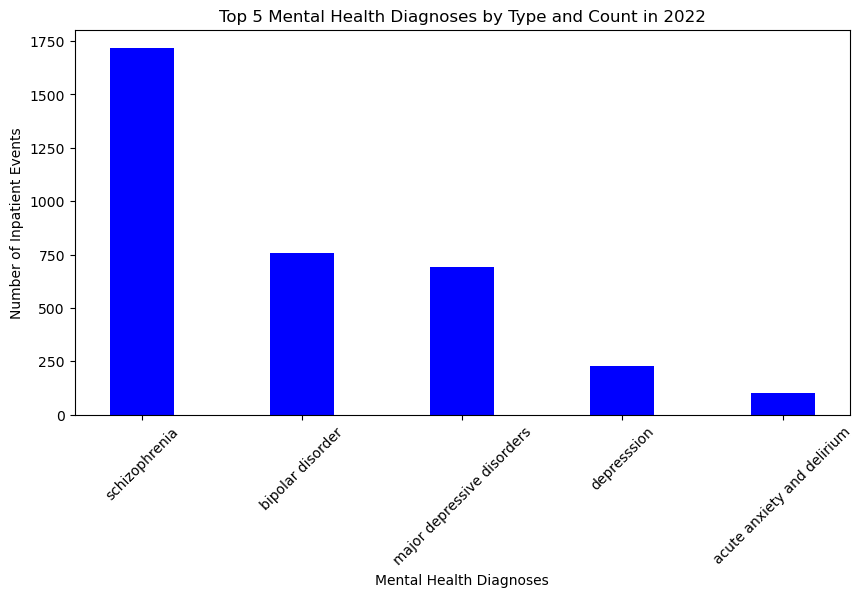

In [9]:
data = {'schizophrenia':1718, 'bipolar disorder':759, 'major depressive disorders':694, 'depresssion':227, 'acute anxiety and delirium':103}

diagnoses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.xticks(rotation=45)

plt.bar(diagnoses, values, color ='blue', width = 0.4)

plt.xlabel("Mental Health Diagnoses")
plt.ylabel("Number of Inpatient Events")
plt.title("Top 5 Mental Health Diagnoses by Type and Count in 2022")
plt.show()

In [10]:
#Next, I will review the high-volume hospitals with hospital inpatient stays related to mental health in 2022.  I will also utilize the groupby function to pull this information and the bar chart tool to visualize this information. I will only visualize the hospitals with more than 50 inpatient stays in 2022 related to mental health.

In [11]:
df2.groupby(['Facility Name'])['APR DRG Description'].count()

Facility Name
Brookdale Hospital Medical Center                       203
Brooklyn Hospital Center - Downtown Campus               14
Coney Island Hospital                                   414
Interfaith Medical Center                               146
Kings County Hospital Center                           1264
Kingsbrook Jewish Medical Center                          6
Maimonides Medical Center                               506
Mount Sinai Brooklyn                                     10
NYU Langone Hospital-Brooklyn                           301
New York - Presbyterian Brooklyn Methodist Hospital      53
New York Community Hospital of Brooklyn, Inc              1
University Hospital of Brooklyn                           3
Woodhull Medical & Mental Health Center                 754
Wyckoff Heights Medical Center                           27
Name: APR DRG Description, dtype: int64

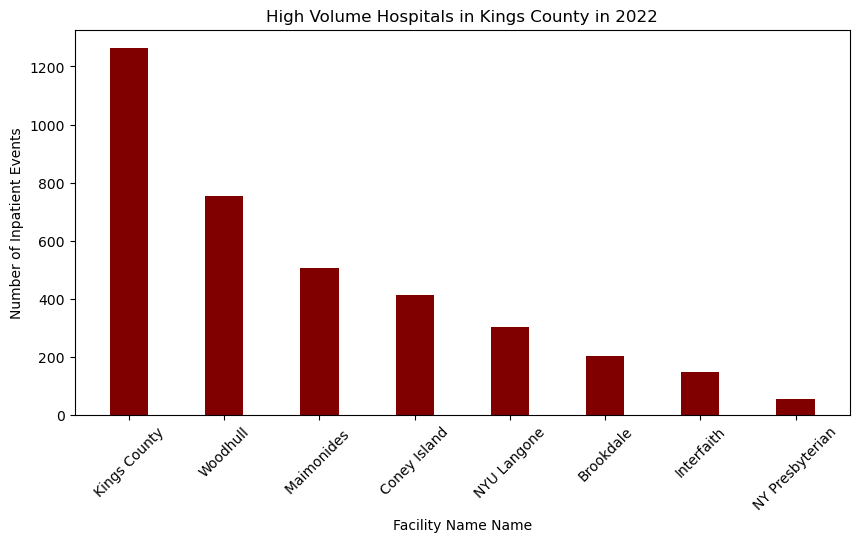

In [12]:
data = {'Kings County':1264, 'Woodhull':754, 'Maimonides ': 506, 'Coney Island':414, 'NYU Langone':301, 'Brookdale': 203, 'Interfaith': 146, 'NY Presbyterian': 53}

diagnoses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.xticks(rotation=45)

plt.bar(diagnoses, values, color ='maroon', width = 0.4)

plt.xlabel("Facility Name Name")
plt.ylabel("Number of Inpatient Events")
plt.title("High Volume Hospitals in Kings County in 2022")
plt.show()

In [13]:
#Next I will review hospital inpatient stays by race.  I will pull this data using the GroupBy function and then visualize this information with the pie chart tool.

In [14]:
df2.groupby(['Race'])['APR DRG Description'].count()

Race
Black/African American    1830
Multi-racial               112
Other Race                1031
White                      729
Name: APR DRG Description, dtype: int64

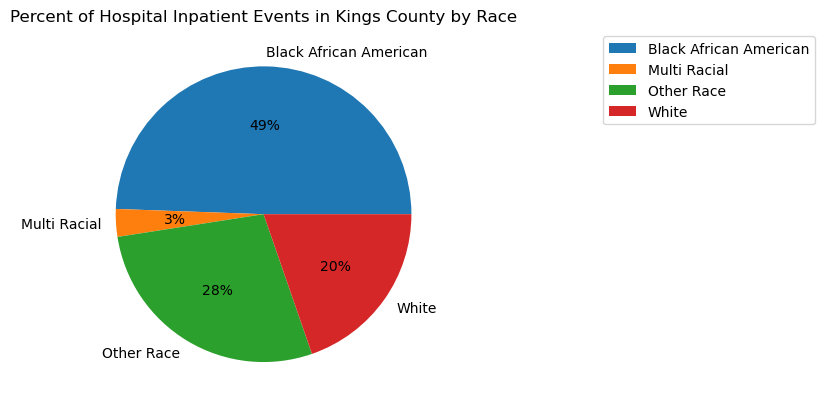

In [15]:
df8 = pd.DataFrame({ 'Race': ['Black African American', 'Multi Racial', 'Other Race', 'White' ], '': [1830, 112, 1031, 729]})
df8.groupby(['Race']).sum().plot(kind='pie', y='', autopct='%1.0f%%', title='Percent of Hospital Inpatient Events in Kings County by Race')
plt.legend(bbox_to_anchor=(1.40, 1), loc='upper left')

In [16]:
#Next I will review hospital inpatient stays by age group.  I will utilize the GroupBy function to pull this data and then visualize the information with the pie chart.

In [17]:
df2.groupby(['Age Group'])['APR DRG Description'].count()

Age Group
0 to 17         175
18 to 29       1163
30 to 49       1433
50 to 69        822
70 or Older     109
Name: APR DRG Description, dtype: int64

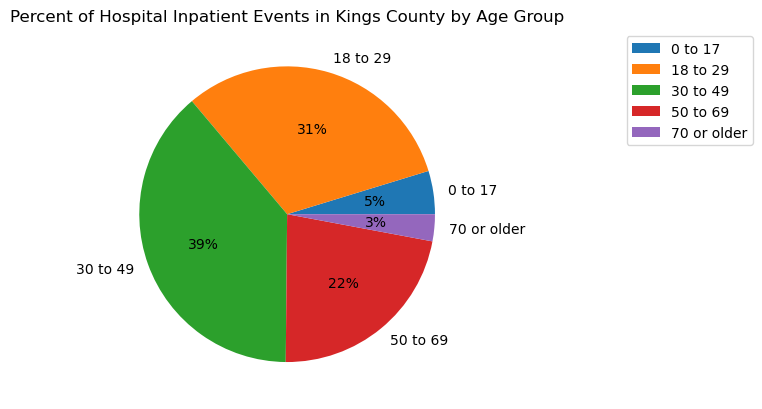

In [18]:
df6 = pd.DataFrame({ 'Age Group': ['0 to 17', '18 to 29', '30 to 49', '50 to 69', '70 or older'], '': [175, 1163, 1433, 822, 109]})
df6.groupby(['Age Group']).sum().plot(kind='pie', y='', autopct='%1.0f%%', title='Percent of Hospital Inpatient Events in Kings County by Age Group')
plt.legend(bbox_to_anchor=(1.40, 1), loc='upper left')

In [19]:
#Next I will review hospital inpatient stays by gender.  I will utilize the groupby function to pull this data and then visualize the information with the pie chart.

In [20]:
df2.groupby(['Gender'])['APR DRG Description'].count()

Gender
F    1685
M    2017
Name: APR DRG Description, dtype: int64

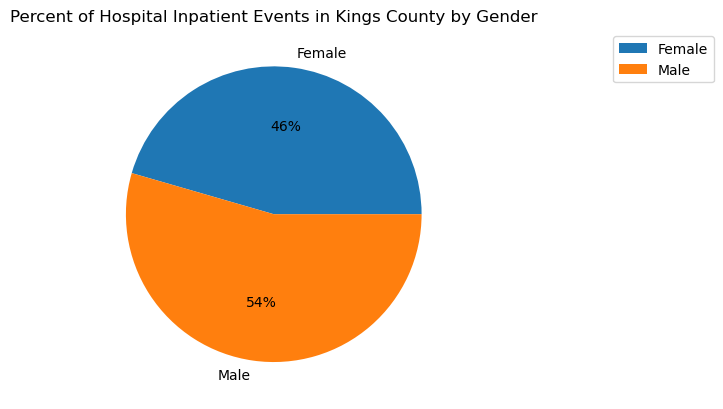

In [21]:
df5 = pd.DataFrame({ 'Gender': ['Female', 'Male'], '': [1685, 2017]})
df5.groupby(['Gender']).sum().plot(kind='pie', y='', autopct='%1.0f%%', title='Percent of Hospital Inpatient Events in Kings County by Gender')
plt.legend(bbox_to_anchor=(1.40, 1), loc='upper left')

In [ ]:
#In conclusion, the majority of hospital inpatient events took place at Kings County and Woodhull Hospitals, which is part of the NYC Health and Hospital System. The top 5 mental health diagnoses tied to the inpatient events included Schizophrenia, bipolar disorder, major depressive disorder, depression, and acute anxiety and delirium. The majority of patients at 49% identified themselves as Black/African American.  Most patients were in the 30 - 49 age group at 39% and most identified as male at 54%.   

In [ ]:
#My recommendation is to continue to follow the patient's journey in the health care system by finding out what happens after they have been discharged from the hospital.  It is important to know if patients are following up with mental health providers and/or primary care doctors after they have been discharged.  We must ensure that after they complete follow-up visits immediately after discharge (within 7 - 30 days), that patients remain engaged in treatment and remain adherent to their prescribed medications.  We must also determine if members are being readmitted to the hospital within 30 days with the same illness after their dishcharge.  Lastly, hospitals and managed care plans must utilize this data to develop strategies to improve follow-up rates with providers after hospitalization and to reduce readmission rates.   